In [11]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
RSEED=42

# from xgboost import XGBClassifier


#imort the data

data = pd.read_csv('data/cleaned_data.csv')

data.head()




,state,slug,launched_at_weekday,launched_at_month,duration_days,goal_in_usd,north_america
0,1,10,2,12,45,200.0,1
1,1,0,2,2,20,400.0,1
2,1,11,1,11,30,27224.0,1
3,1,5,5,10,41,45461.0,0
4,0,13,0,3,30,1000.0,1


In [4]:
data['state'] = data['state'].astype('category')

In [5]:
# define target and features variables

X = data.drop('state', axis=1)
y = data.state

In [6]:
# split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=RSEED)

In [7]:
# fit model to training data

xgb = XGBClassifier(random_state=RSEED,
                    n_jobs=-1,
                    # n_estimators=100,
                    # learning_rate=0.3,
                    # subsample=0.5,
                    )
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:

# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier

In [9]:
# Define base models
base_models4 = [
    ('rf', RandomForestClassifier(n_estimators=90, random_state=RSEED)),
    ('gb', GradientBoostingClassifier(n_estimators=90, random_state=RSEED))
]

# Define the final estimator (meta-model)
final_estimator = LogisticRegression()

# Create the StackingClassifier
stacking_classifier4 = StackingClassifier(base_models4, final_estimator=final_estimator, cv=5)

# Fit the model on the training data
stacking_classifier4.fit(X_train, y_train)

# Make predictions on the test set
y_pred4 = stacking_classifier4.predict(X_test)

# Evaluate the accuracy
accuracy4 = accuracy_score(y_test, y_pred4)
print("Stack_accuracy:", accuracy4)

print(classification_report(y_test, y_pred4))

Stack_accuracy: 0.7003362541617664
              precision    recall  f1-score   support

           0       0.69      0.51      0.59     25135
           1       0.71      0.83      0.76     35236

    accuracy                           0.70     60371
   macro avg       0.70      0.67      0.68     60371
weighted avg       0.70      0.70      0.69     60371



<Axes: >

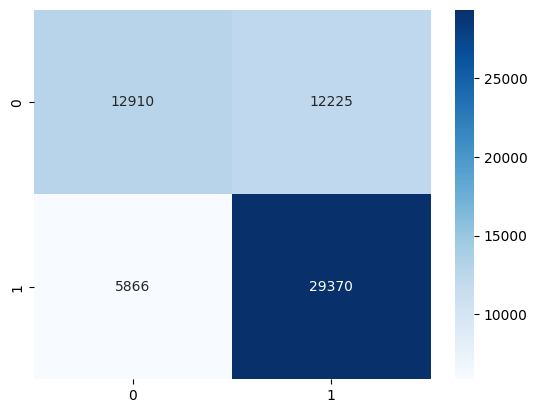

In [12]:
cm = confusion_matrix(y_test, y_pred4)

sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')